In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [3]:
state_df = pd.read_csv('./StatewiseTestingDetails.csv')
country_df = pd.read_csv('./covid_19_india.csv')

In [4]:
country_df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15801,15802,2021-06-08,8:00 AM,Telangana,-,-,564303,3394,593103
15802,15803,2021-06-08,8:00 AM,Tripura,-,-,49579,572,56169
15803,15804,2021-06-08,8:00 AM,Uttarakhand,-,-,313566,6731,334419
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083


In [5]:
country_df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
country_df = country_df.drop(['Time','Sno','ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1)
country_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
15801,2021-06-08,Telangana,564303,3394,593103
15802,2021-06-08,Tripura,49579,572,56169
15803,2021-06-08,Uttarakhand,313566,6731,334419
15804,2021-06-08,Uttar Pradesh,1662069,21333,1699083


In [7]:
country_df['Active'] = country_df['Confirmed'] - country_df['Cured'] - country_df['Deaths']
country_df.tail() 

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
15801,2021-06-08,Telangana,564303,3394,593103,25406
15802,2021-06-08,Tripura,49579,572,56169,6018
15803,2021-06-08,Uttarakhand,313566,6731,334419,14122
15804,2021-06-08,Uttar Pradesh,1662069,21333,1699083,15681
15805,2021-06-08,West Bengal,1388771,16362,1432019,26886


In [8]:
country_df['Date'] = pd.to_datetime(country_df['Date'])

In [9]:
country_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


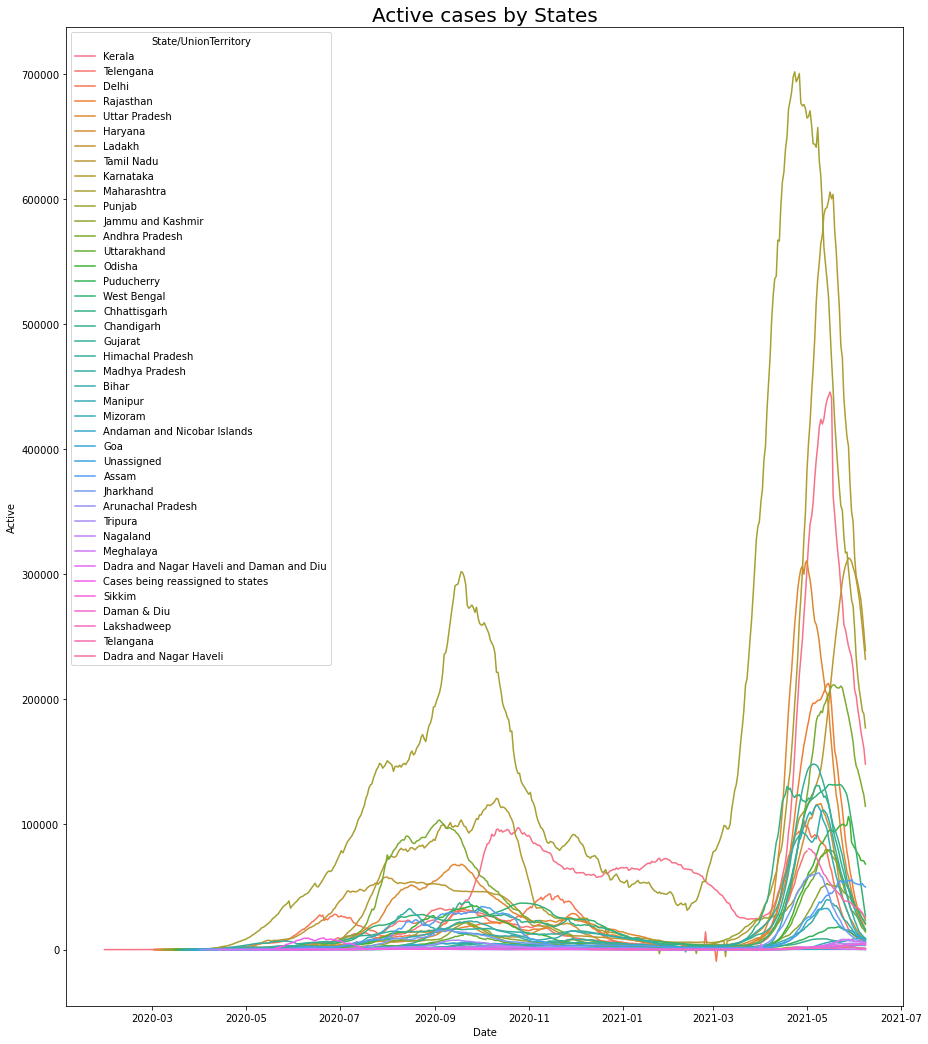

In [15]:
fig=plt.figure(figsize=(15,18))
ax=sns.lineplot(data=country_df,x='Date',y='Active',hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()

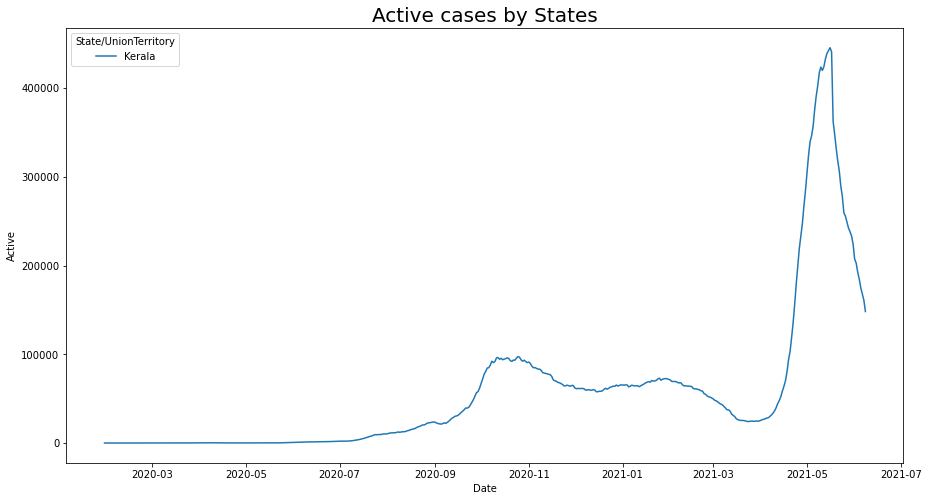

In [66]:
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=country_df[country_df['State/UnionTerritory'].isin(['Kerala'])],x='Date',y='Active',hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=20)
plt.show()

In [32]:
india_cases.head()

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Andaman and Nicobar Islands,6912,123,7131,96
Andhra Pradesh,1637149,11552,1763211,114510
Arunachal Pradesh,26131,125,29696,3440
Assam,385032,3695,438746,50019
Bihar,700224,5424,713879,8231


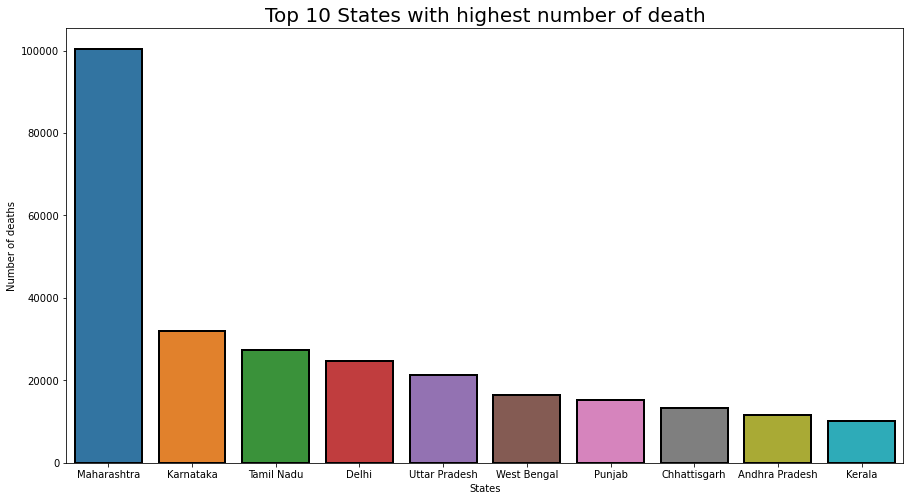

In [33]:
top_10_death_states = india_cases.sort_values('Deaths',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of death", size=20)
plt.xlabel("states")
plt.ylabel("Number of deaths in thousands")
ax=sns.barplot(data=top_10_death_states.iloc[:10],y=top_10_death_states.Deaths,x=top_10_death_states.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of deaths')
plt.show()

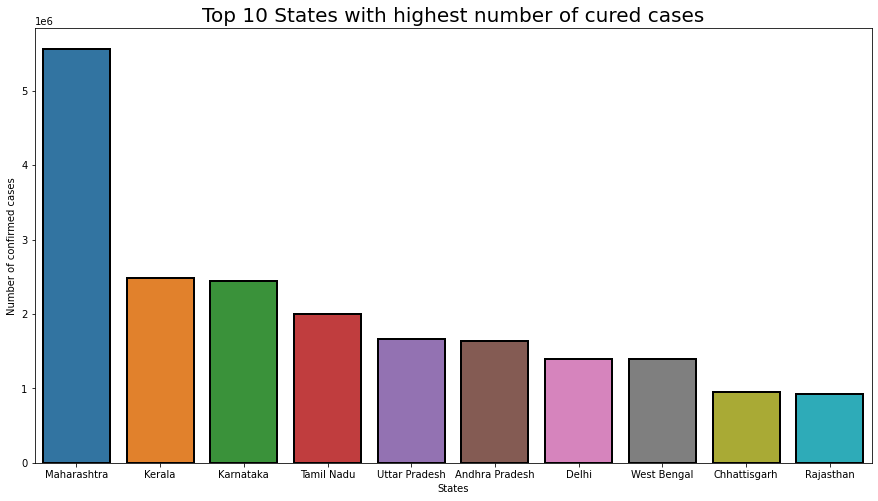

In [56]:
top_10_cured_cases = india_cases.sort_values('Cured',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of cured cases", size=20)
plt.xlabel("states")
plt.ylabel("Number of cured cases")
ax=sns.barplot(data=top_10_cured_cases.iloc[:10],y=top_10_cured_cases.Cured,x=top_10_cured_cases.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()